In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

plt.rcParams['xtick.labelsize']  = 12
plt.rcParams['ytick.labelsize']  = 12
plt.rcParams['axes.labelsize']   = 12
plt.rcParams['axes.titlesize']   = 12
plt.rcParams['legend.fontsize']  = 12

In [2]:
market = pd.read_csv('../data/estaticos_market.csv', index_col=0)
market.drop(market.columns[market.isna().sum()/len(market) >= 0.1], axis=1, inplace=True)
market.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,ACIMA DE 1 ANO,23.0,ALTA,False,True,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,ATE 1 ANO,9.0,BAIXA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,ACIMA DE 1 ANO,26.0,MEDIA,False,True,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,ACIMA DE 1 ANO,26.0,MEDIA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,ACIMA DE 1 ANO,27.0,ALTA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


In [3]:
market.drop(['dt_situacao', 'fl_st_especial', 'fl_epp', 'idade_emp_cat', 'nm_segmento', 'de_ramo', 'setor',
             'de_faixa_faturamento_estimado_grupo', 'de_faixa_faturamento_estimado', 'sg_uf', 'de_saude_rescencia',
             'fl_matriz', 'natureza_juridica_macro', 'fl_mei', 'vl_total_veiculos_leves_grupo', 
             'vl_faturamento_estimado_grupo_aux'], axis=1, inplace=True)

In [4]:
market.shape

(462298, 22)

In [5]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               462298 non-null  object 
 1   de_natureza_juridica             462298 non-null  object 
 2   idade_empresa_anos               462298 non-null  float64
 3   fl_me                            462298 non-null  bool   
 4   fl_sa                            462298 non-null  bool   
 5   fl_ltda                          462298 non-null  bool   
 6   fl_email                         462298 non-null  bool   
 7   fl_telefone                      462298 non-null  bool   
 8   fl_rm                            462298 non-null  object 
 9   nm_divisao                       460371 non-null  object 
 10  fl_spa                           460371 non-null  object 
 11  fl_antt                          460371 non-null  object 
 12  fl

In [6]:
obj_mode = market.select_dtypes(include=object).mode().iloc[0]
obj_cols = market.select_dtypes(include=object).columns
market[obj_cols] = market[obj_cols].fillna(value=obj_mode)
market['fl_rm'] = [True if i == 'SIM' else False for i in market['fl_rm']]

In [7]:
num_median = market.select_dtypes(include='float64').median()
num_cols   = market.select_dtypes(include='float64').columns
market[num_cols] = market[num_cols].fillna(value=num_median)

In [8]:
bool_cols = market.select_dtypes(include=bool).columns
market[bool_cols] = market[bool_cols].astype(int)

In [9]:
cat_cols = market.select_dtypes(include=object).iloc[0: , 1:].columns
market[cat_cols] = market[cat_cols].apply(lambda col: LabelEncoder().fit_transform(col))
market.head()

,id,de_natureza_juridica,idade_empresa_anos,fl_me,fl_sa,fl_ltda,fl_email,fl_telefone,fl_rm,nm_divisao,...,fl_veiculo,vl_total_veiculos_pesados_grupo,sg_uf_matriz,de_saude_tributaria,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,fl_passivel_iss,vl_faturamento_estimado_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,60,14.457534,0,0,0,1,1,1,32,...,0,0.0,19,4,23.0,0,0,1,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,17,1.463014,0,0,0,1,1,1,3,...,0,0.0,16,2,9.0,1,0,1,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,17,7.093151,0,0,0,0,1,1,86,...,0,0.0,2,0,26.0,2,0,1,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,17,6.512329,0,0,0,1,1,1,74,...,0,0.0,2,0,26.0,2,0,1,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,17,3.200000,0,0,0,1,1,1,77,...,0,0.0,19,4,27.0,0,0,1,210000.0,0


In [16]:
market_transform = MinMaxScaler().fit_transform(market.iloc[0:, 1:])

In [10]:
pps_matrix = pps.matrix(market.iloc[:,1:])

/home/marimigliorini/miniconda3/envs/AceleraDev_Challenge/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/marimigliorini/miniconda3/envs/AceleraDev_Challenge/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/marimigliorini/miniconda3/envs/AceleraDev_Challenge/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/marimigliorini/miniconda3/envs/AceleraDev_Challenge/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is l

/home/marimigliorini/miniconda3/envs/AceleraDev_Challenge/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/marimigliorini/miniconda3/envs/AceleraDev_Challenge/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/marimigliorini/miniconda3/envs/AceleraDev_Challenge/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/marimigliorini/miniconda3/envs/AceleraDev_Challenge/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is l

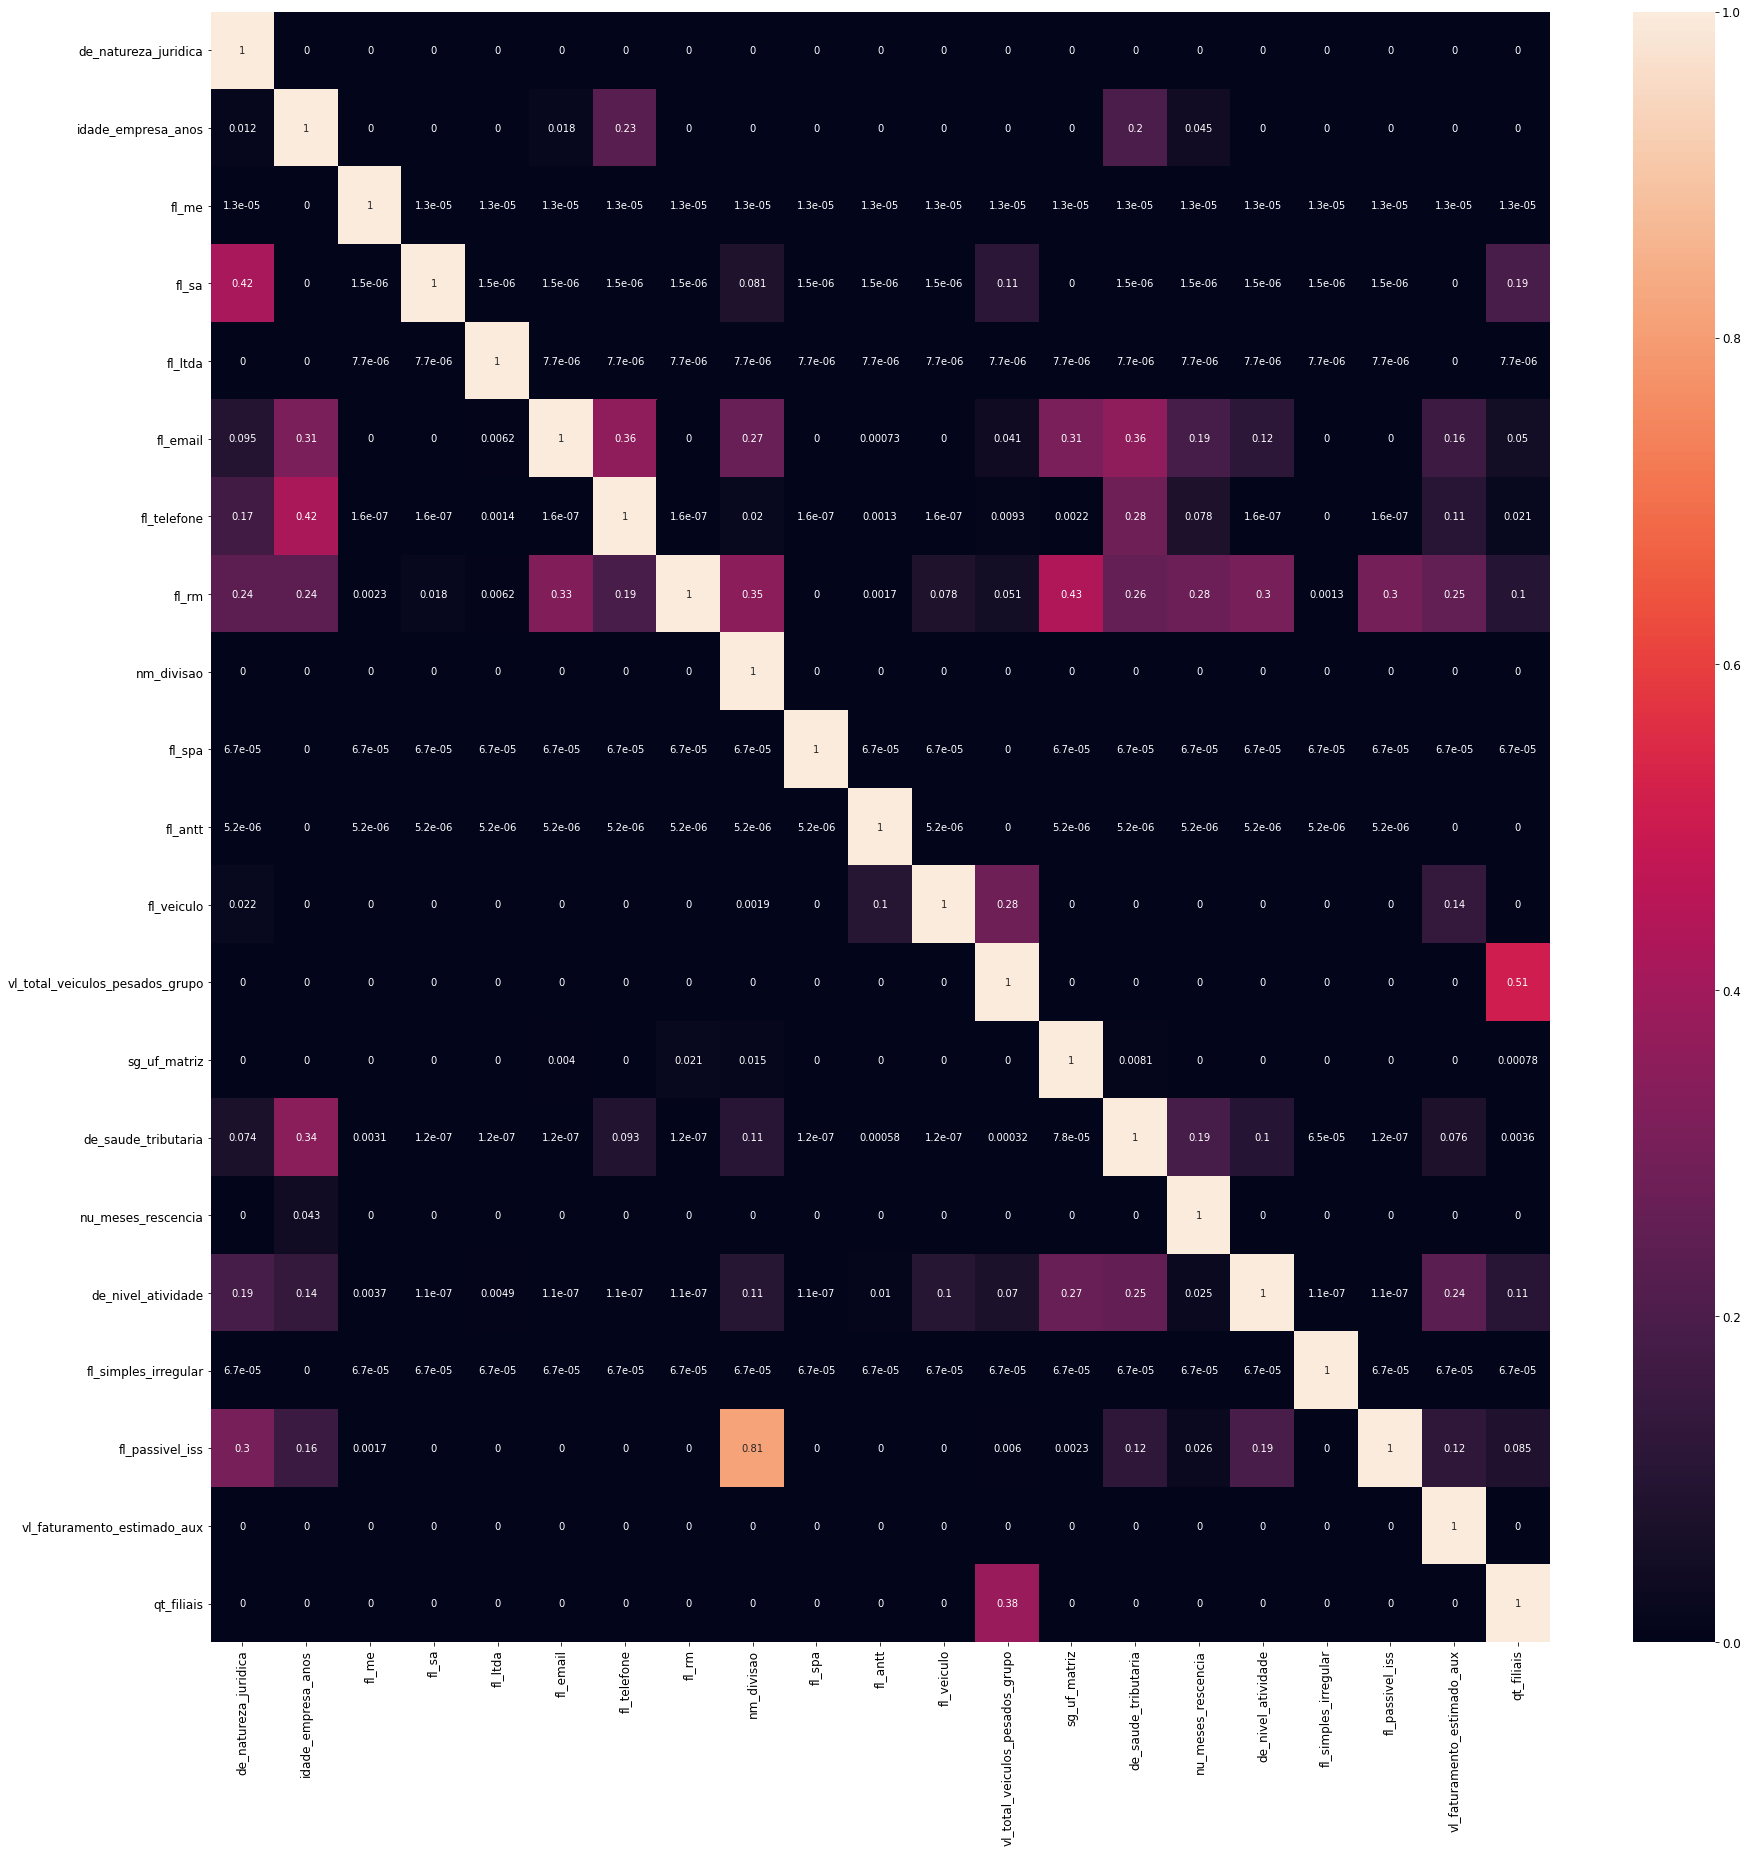

In [11]:
plt.figure(figsize=(30,30))
sns.heatmap(pps_matrix, annot=True)
plt.show()